In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.drop(columns="duration", inplace=True)

In [4]:
df['education'].replace({'basic.9y':'basic','basic.4y':'basic','basic.6y':'basic','unknown':'illiterate'},inplace=True)
df['job'].replace({'self-employed':'entrepreneur'},inplace=True)

In [5]:
data = df

In [6]:
data['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate              1749
Name: education, dtype: int64

In [7]:
data['job'].value_counts()

admin.          10422
blue-collar      9254
technician       6743
services         3969
management       2924
entrepreneur     2877
retired          1720
housemaid        1060
unemployed       1014
student           875
unknown           330
Name: job, dtype: int64

In [8]:
data['deposit_subscription']=np.where(df.y=='yes',1,0)

In [9]:
data = data.drop(['y'],axis=1)

In [10]:
data = pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','day_of_week','poutcome','month'])

In [11]:
columns = [column for column in data.columns if column != 'deposit_subscription']
columns = ['deposit_subscription'] + columns 
data = data[columns]

In [12]:
numerical_columns =['age','pdays','emp.var.rate','cons.price.idx','euribor3m','nr.employed','cons.conf.idx']

In [13]:
scaler =StandardScaler()
data[numerical_columns]=scaler.fit_transform(data[numerical_columns])

In [14]:
data.head()

,deposit_subscription,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
1,0,1.628993,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
2,0,-0.290186,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
3,0,-0.002309,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0
4,0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,0,0,0,0,1,0,0,0


In [15]:
#removing outliers
columns = data.columns.tolist()
columns= [c for c in columns if c not in['deposit_subscription']]
target='deposit_subscription'
state = np.random.RandomState(42)
X=data[columns]
y=data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(y.shape)

(41188, 58)
(41188,)


In [16]:
# defining the random sampler function
ROS = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ROS.fit_resample(X, y)

In [17]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (73096, 58)
After OverSampling, the shape of train_y: (73096,) 



In [18]:
pca = PCA(n_components = 10)
pca.fit(X_train_res)
X = pca.transform(X_train_res)

In [19]:
principal_df = pd.DataFrame(data = X, columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7', 'PC_8', 'PC_9','PC_10'])
principal_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.276952,-2.230390,1.150139,1.734077,0.584310,0.719207,0.792166,0.372606,-0.391083,-0.087376
1,0.325383,-2.277034,1.198150,1.756272,0.585515,0.717050,0.774620,0.334196,-0.476961,0.029730
2,0.305623,-2.285808,0.962704,0.331220,-0.654704,0.693847,-0.563195,0.764130,-0.314150,-0.437742
3,0.313300,-2.287627,1.025344,0.619066,-0.431400,0.810550,0.776608,0.348803,-0.403410,-0.544216
4,0.271695,-2.218908,1.137036,1.606775,0.457465,0.723428,0.586589,0.025360,-0.576561,-0.146088
...,...,...,...,...,...,...,...,...,...,...
73091,-1.469730,-0.583999,-1.701791,-1.001196,0.649575,-0.461929,0.046107,1.811149,0.077529,-0.155661
73092,-1.917454,-0.030901,-1.205776,0.121548,-1.059995,1.827015,-0.469164,1.110078,-0.061522,-0.389262
73093,-1.771850,-0.215546,-1.600661,-1.517693,0.324509,-0.196757,1.149231,0.605931,0.773588,0.717548
73094,-0.834298,0.271174,-1.564454,0.495121,2.249354,-0.581478,-0.744960,-0.381967,-0.590388,-0.231182


In [20]:
print('Explained variation in pca: {}'.format(pca.explained_variance_ratio_))

Explained variation in pca: [0.29397836 0.20062126 0.10630713 0.0727688  0.05776813 0.0334947
 0.02171644 0.02009076 0.01501432 0.01431278]


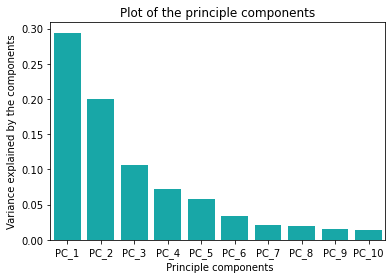

In [21]:
df1 = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7',
                          'PC_8', 'PC_9','PC_10']})
sns.barplot(x='PC',y="var", 
           data=df1, color="c")
plt.xlabel(" Principle components")
plt.ylabel("Variance explained by the components")
plt.title("Plot of the principle components")
plt.show()